<a href="https://colab.research.google.com/github/git-ginwook/InsightToInterface/blob/main/explorations/smart_stadium/VIP_YoloWorld_playerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ultalytics Documentation: https://docs.ultralytics.com/quickstart/#install-ultralytics
https://docs.ultralytics.com/models/yolo-world/#train-usage

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLOWorld

# # Load a pretrained YOLOv8s-worldv2 model
# model = YOLOWorld("/content/yolov8s-worldv2.pt")

# Load a pretrained YOLOv8x-worldv2 model
model = YOLOWorld("/yolov8x-worldv2.pt")

100%|██████████| 140M/140M [00:05<00:00, 28.5MB/s]


Detecting objects in image

In [ ]:
# Run inference with the YOLOv8n model on the 'bus.jpg' image
# img_results = model("test.jpg")
img_results = model("2017_G6017_Q1_01.jpeg")


image 1/1 /content/2017_G6017_Q1_01.jpeg: 384x640 2 persons, 3697.4ms
Speed: 5.1ms preprocess, 3697.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


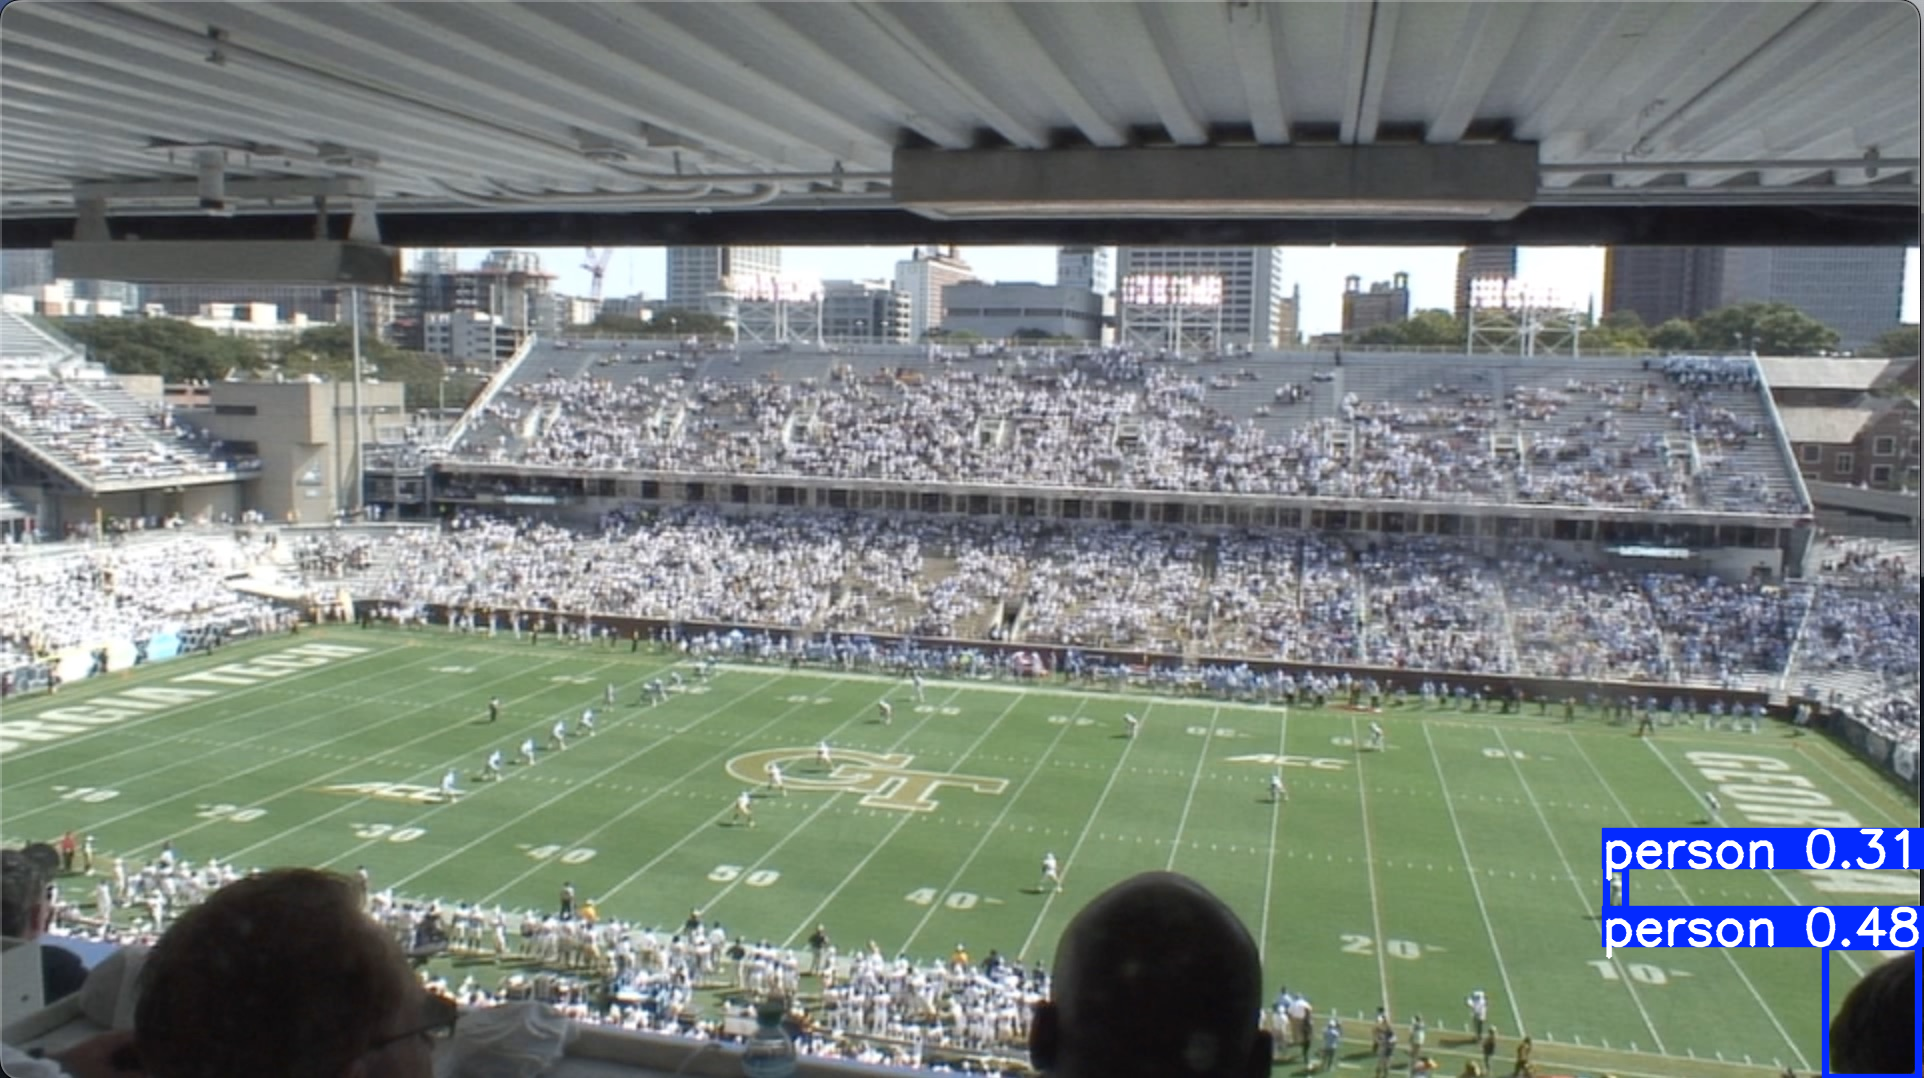

In [ ]:
img_results[0].show()


Tracking objects on video

In [ ]:
# Track with a YOLO-World model on a video
video_results = model.track(source="005.mp4")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/278) /content/005.mp4: 384x640 14 persons, 1 cup, 3841.3ms
video 1/1 (frame 2/278) /content/005.mp4: 384x640 14 persons, 1 cup, 2540.5ms
video 1/1 (frame 3/278) /content/005.mp4: 384x640 14 persons, 1 cup, 2576.6ms
video 1/1 (frame 4/278) /content/005.mp4: 384x640 14 persons, 1 cup, 2557.2ms
video 1/1 (frame 5/278) /content/005.mp4: 384x640 14 persons, 1 cup, 3070.5ms
video 1/1 (frame 6/278) /content/005.mp4: 384x640 14 persons, 1 cu

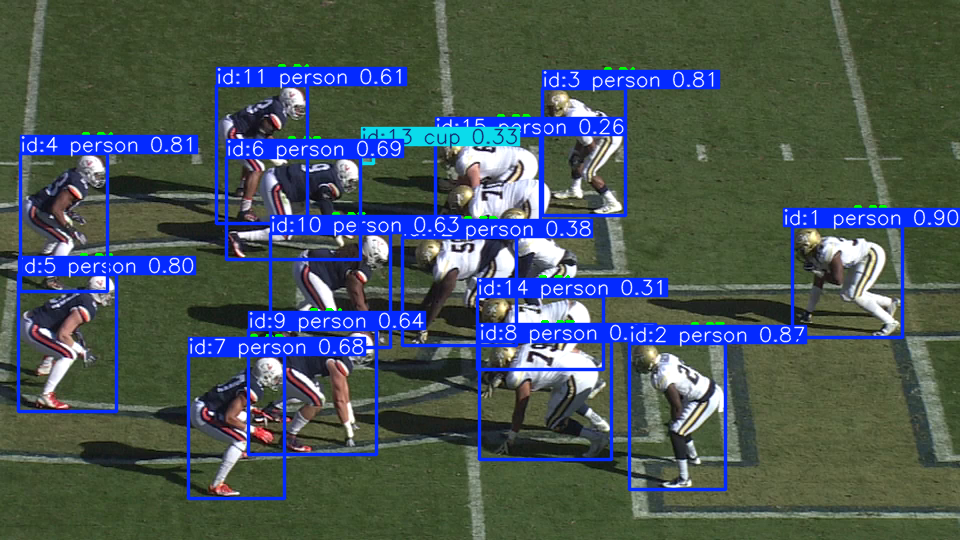

In [ ]:
# show zero-shot for the starting frame (0th frame)
video_results[0].show()

Single Frame
- filter for 'person' only

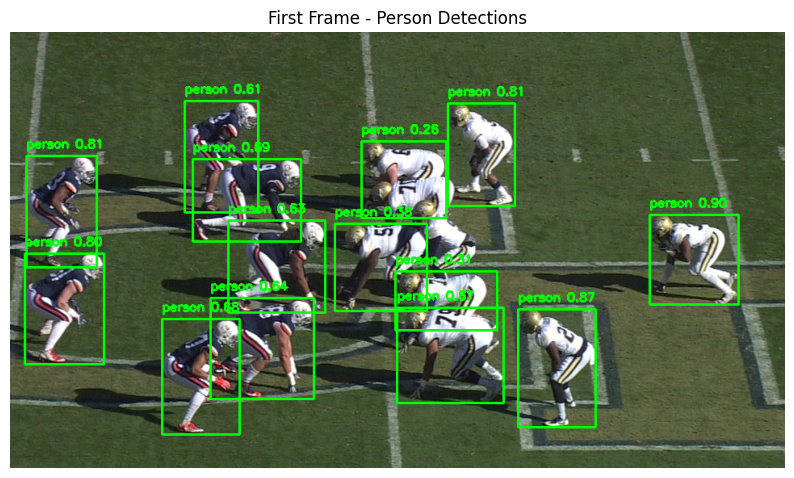

In [ ]:
# Extract results from the first frame
first_frame_result = video_results[0]

# Check if there are detections in the first frame
if first_frame_result is not None and first_frame_result.boxes is not None:
    # Extract bounding boxes, class IDs, and confidence scores
    boxes = first_frame_result.boxes.xyxy.tolist()
    class_ids = first_frame_result.boxes.cls.tolist()
    confidences = first_frame_result.boxes.conf.tolist()

    # Read original frame
    frame = first_frame_result.orig_img  # Original image from results

    # Iterate over detections and draw only 'person' bounding boxes
    for i, class_id in enumerate(class_ids):
        label = model.names[int(class_id)]  # Convert class ID to label
        if label == 'person':  # Filter only 'person' detections
            x1, y1, x2, y2 = map(int, boxes[i])  # Get bbox coordinates
            conf = confidences[i]  # Confidence score

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text = f"{label} {conf:.2f}"
            cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.title("First Frame - Person Detections")
    plt.show()
else:
    print("No detections found in the first frame.")


ALL frames
- filter for 'person' only

In [ ]:
# Define a function to filter detections for the 'person' class
def filter_person_detections(video_results):
    person_detections = []

    for result in video_results:  # Iterate through results (one per frame)
        if result is not None and result.boxes is not None:
            boxes = result.boxes  # Get bounding boxes
            class_ids = boxes.cls.tolist()  # Convert class tensor to list
            confidences = boxes.conf.tolist()  # Convert confidence tensor to list
            bboxes = boxes.xyxy.tolist()  # Convert bounding boxes tensor to list

            # Iterate over detected objects
            for i, class_id in enumerate(class_ids):
                label = model.names[int(class_id)]  # Convert class ID to label
                if label == 'person':  # Filter only 'person' detections
                    person_detections.append({
                        "bbox": bboxes[i],  # Bounding box coordinates (x1, y1, x2, y2)
                        "confidence": confidences[i],  # Confidence score
                        "class": label
                    })

    return person_detections

# Get filtered 'person' detections
person_detections = filter_person_detections(video_results)

# Print or save the results
for detection in person_detections:
    print(detection)

{'bbox': [792.0098876953125, 226.3515625, 902.113037109375, 337.90350341796875], 'confidence': 0.9018310904502869, 'class': 'person'}
{'bbox': [629.7903442382812, 343.11456298828125, 725.3530883789062, 489.8521728515625], 'confidence': 0.8713536858558655, 'class': 'person'}
{'bbox': [542.841064453125, 88.68998718261719, 625.5234375, 215.24514770507812], 'confidence': 0.8124879002571106, 'class': 'person'}
{'bbox': [20.148902893066406, 153.80410766601562, 107.5444107055664, 291.5766906738281], 'confidence': 0.8062690496444702, 'class': 'person'}
{'bbox': [18.526615142822266, 274.11907958984375, 116.8935546875, 411.3766784667969], 'confidence': 0.8014431595802307, 'class': 'person'}
{'bbox': [226.67092895507812, 157.59942626953125, 360.8517150878906, 259.0956115722656], 'confidence': 0.6942609548568726, 'class': 'person'}
{'bbox': [188.01388549804688, 355.8760070800781, 284.573486328125, 498.2157897949219], 'confidence': 0.6823374629020691, 'class': 'person'}
{'bbox': [479.4017639160156,